Import the required modules

In [1]:
 !pip install tensorflow==1.13.2

  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
pip install keras==2.3.0

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: keras==2.3.0 in c:\users\abdim\appdata\local\programs\python\python37\lib\site-packages (2.3.0)
You should consider upgrading via the 'python -m pip install --upgrade pip' command.



In [1]:
import keras
import os

Using TensorFlow backend.


Defining Variables for emotion classes, the size of the images, and batch size
COULD GET RID AND USE THEM IN RELEVANT CODE BLOCKS

In [2]:
num_emotion_classes=7
img_row=48
img_col=48
batch_size=32

loading the dataset. Found on kaggle. 
Training data: 28,709 images (combination of all 7 classes)
Validation data: 7178 images

In [3]:
from google.colab import files
uploaded = files.upload()

Saving emotion_dataset.zip to emotion_dataset.zip


unzip the folder

In [4]:
!unzip -q emotion_dataset.zip

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#GDRIVEPATH='/content/drive/My Drive/'
GDRIVEPATH=''

In [4]:
import os,shutil

base_dir = GDRIVEPATH+'emotion_dataset'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_angry_dir = os.path.join(train_dir, 'angry')
train_disgust_dir = os.path.join(train_dir, 'disgust')
train_fear_dir = os.path.join(train_dir, 'fear')
train_happy_dir = os.path.join(train_dir, 'happy')
train_neutral_dir = os.path.join(train_dir, 'neutral')
train_sad_dir = os.path.join(train_dir, 'sad')
train_suprise_dir = os.path.join(train_dir, 'suprise')


test_angry_dir = os.path.join(test_dir, 'angry')
test_disgust_dir = os.path.join(test_dir, 'disgust')
test_fear_dir = os.path.join(test_dir, 'fear')
test_happy_dir = os.path.join(test_dir, 'happy')
test_neutral_dir = os.path.join(test_dir, 'neutral')
test_sad_dir = os.path.join(test_dir, 'sad')
test_suprise_dir = os.path.join(test_dir, 'suprise')


In [5]:
print('total training angry images:', len(os.listdir(train_angry_dir)))

total training angry images: 3995


Image Augmentation on the training and testing data

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        color_mode='grayscale',
        target_size=(48, 48),
        batch_size=32,
        class_mode='categorical',
        shuffle=True) 

test_generator = test_datagen.flow_from_directory(
        test_dir,
        color_mode='grayscale',
        target_size=(48, 48),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [18]:
pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [20]:
pip install pillow


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


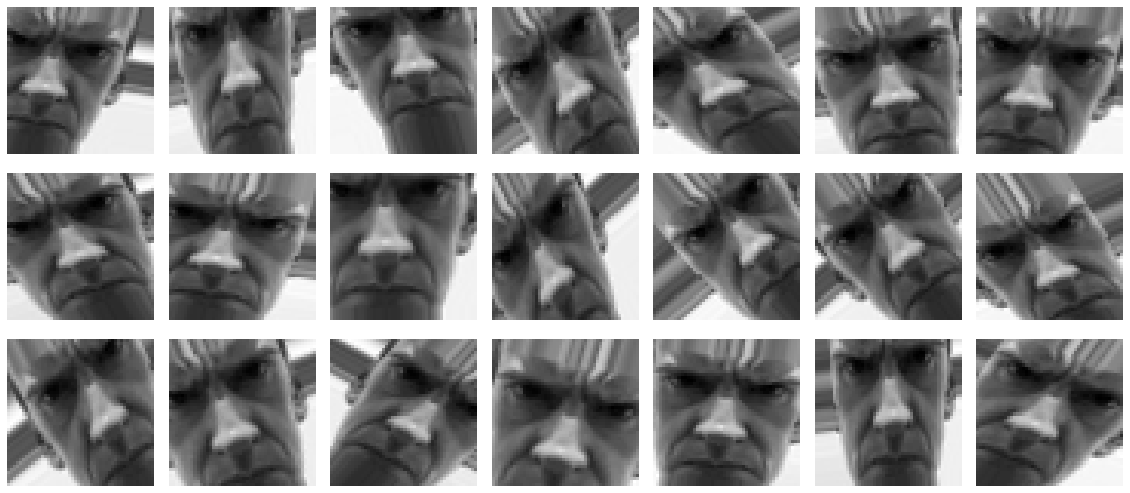

In [10]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(train_sad_dir, fname) for
     fname in os.listdir(train_sad_dir)]

#take one image
img_path = fnames[3]

#load image and resize
img = image.load_img(img_path, target_size=(48, 48))

#Converts it to a Numpy array with shape (48, 48, 1)
x = image.img_to_array(img)
#Reshapes it to (1, 48, 48, 1)
x = x.reshape((1,) + x.shape)

#Generates batches of randomly transformed images.
i = 0
fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for batch in datagen.flow(x, batch_size=1):
    ax = fig.add_subplot(5, 7, i+1)
    ax.axis('off')
    ax.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 21 == 0:
        break
plt.show()

CREATING THE MODEL
1. 11 layers
2. using elu as activation function for hidden layers
3. softmax as activation function for the output as it is for mutliclass classfication

In [41]:
#*************** MODEL V1 *********************
# from keras import layers
# from keras import models
# from keras import optimizers

# model = models.Sequential()

# model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(48, 48, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))


# #output layer start
# model.add(layers.Dense(7, activation='softmax'))
#end output layer


In [ ]:
#see what the first model looks like
# model.summary()

In [43]:
#compile the model
# model.compile(loss='categorical_crossentropy',
#               optimizer = optimizers.Adam(learning_rate=0.001),
#               metrics=['accuracy'])


In [44]:
#train the first model
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,)

# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         train_dir,
#         target_size=(48, 48),
#         color_mode='grayscale',
#         batch_size=32,
#         class_mode='categorical',
#         shuffle=True)

# validation_generator = test_datagen.flow_from_directory(
#         test_dir,
#         color_mode='grayscale',
#         target_size=(48, 48),
#         batch_size=32,
#         class_mode='categorical',
#         shuffle=True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [11]:
for data_batch, labels_batch in train_generator:
     print('data batch shape:', data_batch.shape)
     print('labels batch shape:', labels_batch.shape)
     break

data batch shape: (32, 48, 48, 1)
labels batch shape: (32, 7)


In [ ]:
#compile the model
# history = model.fit_generator(
#       train_generator,
#       steps_per_epoch=100,
#       epochs=100,
#       validation_data=validation_generator,
#       validation_steps=50)

In [14]:
#*********** MODEL V2 ***********************
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()

#conv2D 32 start
model.add(layers.Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(32,(3,3), padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
#conv2D 32 end

#conv2D 64 start
model.add(layers.Conv2D(64,(3,3), padding='same',kernel_initializer='he_normal'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64,(3,3), padding='same',kernel_initializer='he_normal'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
#conv2D 64 end

#conv2D 128 start
model.add(layers.Conv2D(128,(3,3), padding='same',kernel_initializer='he_normal'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128,(3,3), padding='same',kernel_initializer='he_normal'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
#conv2D 128 end

#conv2D 256 start
model.add(layers.Conv2D(256,(3,3), padding='same',kernel_initializer='he_normal'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(256,(3,3), padding='same',kernel_initializer='he_normal'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
#conv2D 256 end

#dense 64
model.add(layers.Flatten())
model.add(layers.Dense(64,kernel_initializer='he_normal'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64,kernel_initializer='he_normal'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
#end dense 64

#output layer start
model.add(layers.Dense(7,kernel_initializer='he_normal'))
model.add(layers.Activation('softmax'))
#end output layer


In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 32)       

Compiling the model

In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# earlyStopping = EarlyStopping(monitor='val_loss',
#                               min_delta=0,
#                               patience=3,
#                               verbose=1,
#                               restore_best_weights=True)

checkpoint = ModelCheckpoint('EmotionModel.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
reduce_lrOplateau = ReduceLROnPlateau(monitor='val_loss',
                                      factor=0.2,
                                      patience=3,
                                      verbose=1,
                                      min_delta=0.0001)

callbacks= [checkpoint,reduce_lrOplateau]

In [20]:
model.compile(loss='categorical_crossentropy',
 optimizer = optimizers.Adam(lr=0.001),
 metrics=['accuracy'])
nb_train_samples = 24176
nb_validation_samples = 3006
epochs=25



In [21]:
history=model.fit_generator(
 train_generator,
 steps_per_epoch=nb_train_samples//batch_size,
 epochs=epochs,
 callbacks=callbacks,
 validation_data=test_generator,
 validation_steps=nb_validation_samples//batch_size)

Epoch 1/2
755/755 [==============================] - 715s 947ms/step - loss: 0.9610 - accuracy: 0.6565 - val_loss: 0.8740 - val_accuracy: 0.5964

Epoch 00001: val_loss did not improve from 0.63514
Epoch 2/2
755/755 [==============================] - 707s 936ms/step - loss: 0.9514 - accuracy: 0.6597 - val_loss: 1.1006 - val_accuracy: 0.6011

Epoch 00002: val_loss did not improve from 0.63514


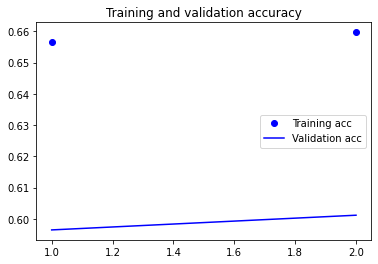

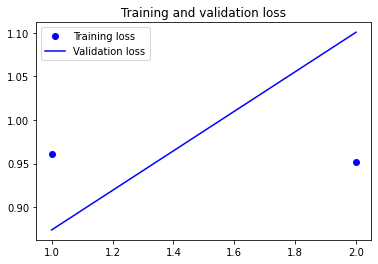

In [22]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
h5py.version

<module 'h5py.version' from 'C:\\Users\\Abdim\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\h5py\\version.py'>

In [1]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np


Using TensorFlow backend.


In [2]:
face_classifier=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

classifier = load_model('EmotionModel.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [3]:
class_labels=['Angry','Disgusted','Afraid','Happy','Neutral','Sad','Surprised']


In [4]:
# cap=cv2.VideoCapture(0)

In [33]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    ret, frame = cap.read()
    labels=[]

    if ret == False:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,250,0),2)
        cv2.rectangle(frame, (x,y-40), (x+w, y), (0,200,0),-1)
        roi_gray=gray[y:y+h,x:x+w]
        roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        if np.sum([roi_gray]) !=0:
            roi=roi_gray.astype('float')/255.0
            roi=img_to_array(roi)
            roi=np.expand_dims(roi,axis=0)

            preds=classifier.predict(roi)[0]
            label=class_labels[preds.argmax()]
            label_position=(x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1.5,(255,255,255),2)
        else:
            cv2.putText(frame,'No face was found',(200,200),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255),2)
            

        



    cv2.imshow('Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()